# AIM

This notebook demonstrates how to read a **MOPITT L3L** (NetCDF format) files using xarray and make a quick plot of the results. 

### Step 1: Import packages required

- xarray for easy handling of netcdf
- cartopy and cartopy.crs for plotting
- (optional) warnings for silencing file warnings

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import warnings
warnings.filterwarnings(action='ignore') 

### Step 2: Specify filename and read

- inspect contents

In [2]:
filename='output/MOPITT_v8.L3L.from_MOPO2J.selected_variables.20020801.nc'
ds=xr.open_dataset(filename)
print(ds)

<xarray.Dataset>
Dimensions:                 (time: 1, longitude: 360, latitude: 180)
Coordinates:
  * time                    (time) object 0001-01-01 01:00:00
  * longitude               (longitude) float32 -179.5 -178.5 ... 178.5 179.5
  * latitude                (latitude) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/13)
    n_obs                   (time, longitude, latitude) float32 ...
    dfs                     (time, longitude, latitude) float32 ...
    tco_ret                 (time, longitude, latitude) float32 ...
    tco_apr                 (time, longitude, latitude) float32 ...
    xco                     (time, longitude, latitude) float32 ...
    dry_air_column          (time, longitude, latitude) float32 ...
    ...                      ...
    vmr_sfc_ret             (time, longitude, latitude) float32 ...
    vmr_sfc_apr             (time, longitude, latitude) float32 ...
    ak_sfc_diagonal         (time, longitude, latitude) float32 ...
    ak_sfc_di

### Step 3: Get data of interest to plot

- here we will choose retrieved surface level vmr ('vmr_sfc_ret')
- the data are stored as (time x lon x lat)
    - only one element in time dimension so can ignore this
    - need to be transposed to (lat x lon) for correct plotting using cartopy

In [3]:
fld=ds['vmr_sfc_ret'][0].transpose()

### Step 4: Quickplot the data 

- (first get datetime string from filename for use in plot title)

Text(0.5, 1.0, '20020801')

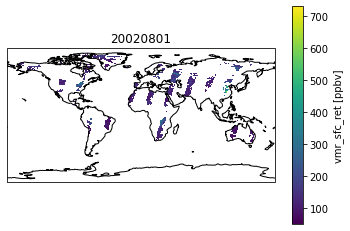

In [4]:
dt=filename.split('.')[4]
p=fld.plot(
    subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=0.0),facecolor="white"),
    transform=ccrs.PlateCarree(),
)
p.axes.coastlines(linewidth=1) 
p.axes.set_title(dt)

### Step 5: Refine the plot

- The stripes of data in the plot above show satellite swaths
- We can zoom to an area with greater density of coverage
- We can also restrict the color scale to better show spatial patterns

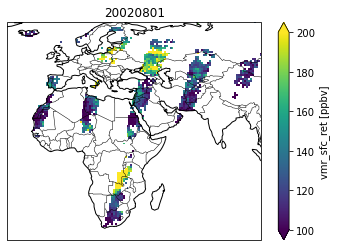

In [5]:
p=fld.plot(
    subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=0.0),facecolor="white"),
    transform=ccrs.PlateCarree(),
    vmin=100,vmax=200
)
p.axes.coastlines(linewidth=1) 
p.axes.add_feature(cartopy.feature.BORDERS,linewidth=0.5)
p.axes.set_title(dt)
p.axes.set_extent([-30, 100, -20, 50])

### Finished

_Ian Ashpole, Nov 2022_